# Exploratory Data Analysis

In this notebook, EDA will be performed on the resale flat prices in Singapore to better understand the dataset

## Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load the dataset

In [19]:
raw_data = pd.read_csv('raw_flat_prices_data.csv', parse_dates= ['month', 'lease_commence_date'])

raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287196 entries, 0 to 287195
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   month                287196 non-null  datetime64[ns]
 1   town                 287196 non-null  object        
 2   flat_type            287196 non-null  object        
 3   block                287196 non-null  object        
 4   street_name          287196 non-null  object        
 5   storey_range         287196 non-null  object        
 6   floor_area_sqm       287196 non-null  float64       
 7   flat_model           287196 non-null  object        
 8   lease_commence_date  287196 non-null  datetime64[ns]
 9   resale_price         287196 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(1), object(6)
memory usage: 21.9+ MB


In [22]:
raw_data.head(5)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977-01-01,9000
1,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977-01-01,6000
2,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977-01-01,8000
3,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977-01-01,6000
4,1990-01-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976-01-01,47200


In [46]:
raw_data.isnull().values.any()

False

## Analysis on the month column

In [37]:
df_month = raw_data.copy(deep= True)
df_month = raw_data[['month', 'resale_price']]

df_month

,month,resale_price
0,1990-01-01,9000
1,1990-01-01,6000
2,1990-01-01,8000
3,1990-01-01,6000
4,1990-01-01,47200
...,...,...
287191,1999-12-01,456000
287192,1999-12-01,408000
287193,1999-12-01,469000
287194,1999-12-01,440000


In [38]:
# Generate 2 features: Year of transanction and the quarter of the year in which it is transacted

df_month['year_of_transaction'] = df_month['month'].dt.year
df_month['quarter'] = df_month['month'].dt.quarter

df_month

C:\Users\limzx\AppData\Local\Temp\ipykernel_16224\305943236.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_month['year_of_transaction'] = df_month['month'].dt.year
C:\Users\limzx\AppData\Local\Temp\ipykernel_16224\305943236.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_month['quarter'] = df_month['month'].dt.quarter


,month,resale_price,year_of_transaction,quarter
0,1990-01-01,9000,1990,1
1,1990-01-01,6000,1990,1
2,1990-01-01,8000,1990,1
3,1990-01-01,6000,1990,1
4,1990-01-01,47200,1990,1
...,...,...,...,...
287191,1999-12-01,456000,1999,4
287192,1999-12-01,408000,1999,4
287193,1999-12-01,469000,1999,4
287194,1999-12-01,440000,1999,4


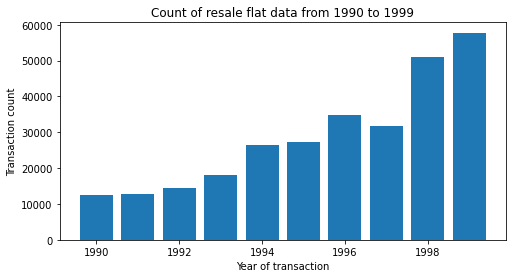

In [67]:
# Show the distribution of data count over the years

data_counts_by_year = df_month.groupby(['year_of_transaction'])['year_of_transaction'].count()

plt.figure(figsize= (8, 4))
plt.bar(data_counts_by_year.index, data_counts_by_year.values)
plt.xlabel('Year of transaction')
plt.ylabel('Transaction count')
plt.title('Count of resale flat data from 1990 to 1999')
plt.show()

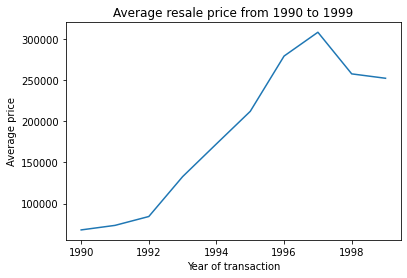

In [63]:
# Show average prices over the years

avg_prices_by_year = df_month.groupby(['year_of_transaction'])['resale_price'].mean()

plt.plot(avg_prices_by_year.index, avg_prices_by_year.values)
plt.xlabel('Year of transaction')
plt.ylabel('Average price')
plt.title('Average resale price from 1990 to 1999')
plt.show()

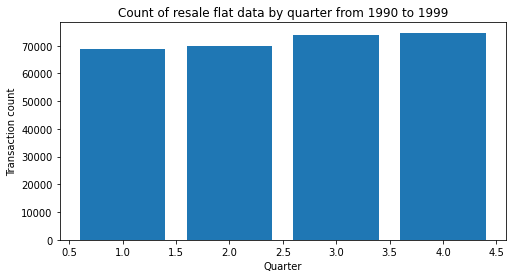

In [66]:
# Show distribution of data count over the quarters

data_counts_by_quarter = df_month.groupby(['quarter'])['quarter'].count()

plt.figure(figsize= (8, 4))
plt.bar(data_counts_by_quarter.index, data_counts_by_quarter.values)
plt.xlabel('Quarter')
plt.ylabel('Transaction count')
plt.title('Count of resale flat data by quarter from 1990 to 1999')
plt.show()

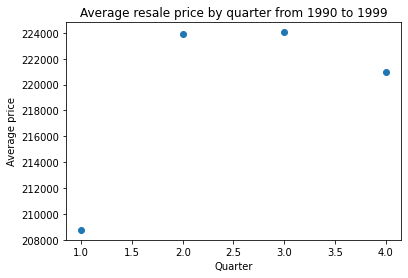

In [69]:
# Show average prices by quarter

avg_prices_by_quarter = df_month.groupby(['quarter'])['resale_price'].mean()

plt.scatter(avg_prices_by_quarter.index, avg_prices_by_quarter.values)
plt.xlabel('Quarter')
plt.ylabel('Average price')
plt.title('Average resale price by quarter from 1990 to 1999')
plt.show()

## Conclusions for month column

* There are more data collected over the years 
* Prices of resale flats increased over the years
* Relatively equal number of data collected per quarter
* Average price by quarter is relatively similar (about < 10% difference)